<a href="https://colab.research.google.com/github/ichiyan/English-Character-Recognition/blob/master/letter_recognition_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from PIL import Image


Prepare dataset
- from https://www.kaggle.com/general/221624 
- originally from Chars74K dataset 

In [ ]:
root_path = 'gdrive/My Drive/coding_projects/letter_recognition/'
data_path = root_path + 'english_handwritten_characters/'
results_path = data_path + 'results/'

data_df = pd.read_csv(data_path + 'english.csv')

data_df = data_df.loc[data_df['label'].isin(['A', 'B', 'C', 'D', 'E'])]
data_df = data_df.reset_index(drop=True)

data_df.rename(columns={'label': 'label_key'}, inplace=True)
data_df['label_value'] = data_df['label_key'].apply(lambda x: ord(x)-65)
data_df['path'] = data_df['image'].apply(lambda x: data_path + x)
data_df.drop('image', axis=1, inplace=True)

display(data_df)
display(data_df['label_value'].value_counts())

,label_key,label_value,path
0,A,0,gdrive/My Drive/coding_projects/letter_recognition/english_handwritten_characters/Img/img011-001.png
1,A,0,gdrive/My Drive/coding_projects/letter_recognition/english_handwritten_characters/Img/img011-002.png
2,A,0,gdrive/My Drive/coding_projects/letter_recognition/english_handwritten_characters/Img/img011-003.png
3,A,0,gdrive/My Drive/coding_projects/letter_recognition/english_handwritten_characters/Img/img011-004.png
4,A,0,gdrive/My Drive/coding_projects/letter_recognition/english_handwritten_characters/Img/img011-005.png
...,...,...,...
270,E,4,gdrive/My Drive/coding_projects/letter_recognition/english_handwritten_characters/Img/img015-051.png
271,E,4,gdrive/My Drive/coding_projects/letter_recognition/english_handwritten_characters/Img/img015-052.png
272,E,4,gdrive/My Drive/coding_projects/letter_recognition/english_handwritten_characters/Img/img015-053.png
273,E,4,gdrive/My Drive/coding_projects/letter_recognition/english_handwritten_characters/Img/img015-054.png


0    55
1    55
2    55
3    55
4    55
Name: label_value, dtype: int64

KNN algorithm for multiclass classification

In [ ]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predicted_labels = [self._predict(x) for x in X]
    return np.array(predicted_labels)

  def _predict(self, x):
    # compute distances
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

    # get k nearest samples, labels
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]

    # majority vote, most common class label
    # Counter most common returns list of tuple/s ex: [(1,3)] where 1 is the most common item and 3 is the number of occurence
    most_common = Counter(k_nearest_labels).most_common(1)
    
 
    return most_common[0][0]



Split data and extract image features (1d vector)

In [ ]:
def extract_img_features(img_paths):
  features_list = []
  for img_path in img_paths:
    img = Image.open(img_path)
    # .resize((32, 32))
    features = (np.array(img)).flatten()
    features_list.append(features)

  return features_list

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df['path'].tolist(), data_df['label_value'].tolist(), test_size=0.2, shuffle=True, random_state=8)
X_train = extract_img_features(X_train)
X_test = extract_img_features(X_test)


Train and test

In [ ]:
# classifier
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc = np.sum(predictions == y_test) / len(y_test)
print(f"Accuracy: {acc}")

Accuracy: 0.6909090909090909


Saving and Displaying Results

In [ ]:
keys = ['A', 'B', 'C', 'D', 'E']

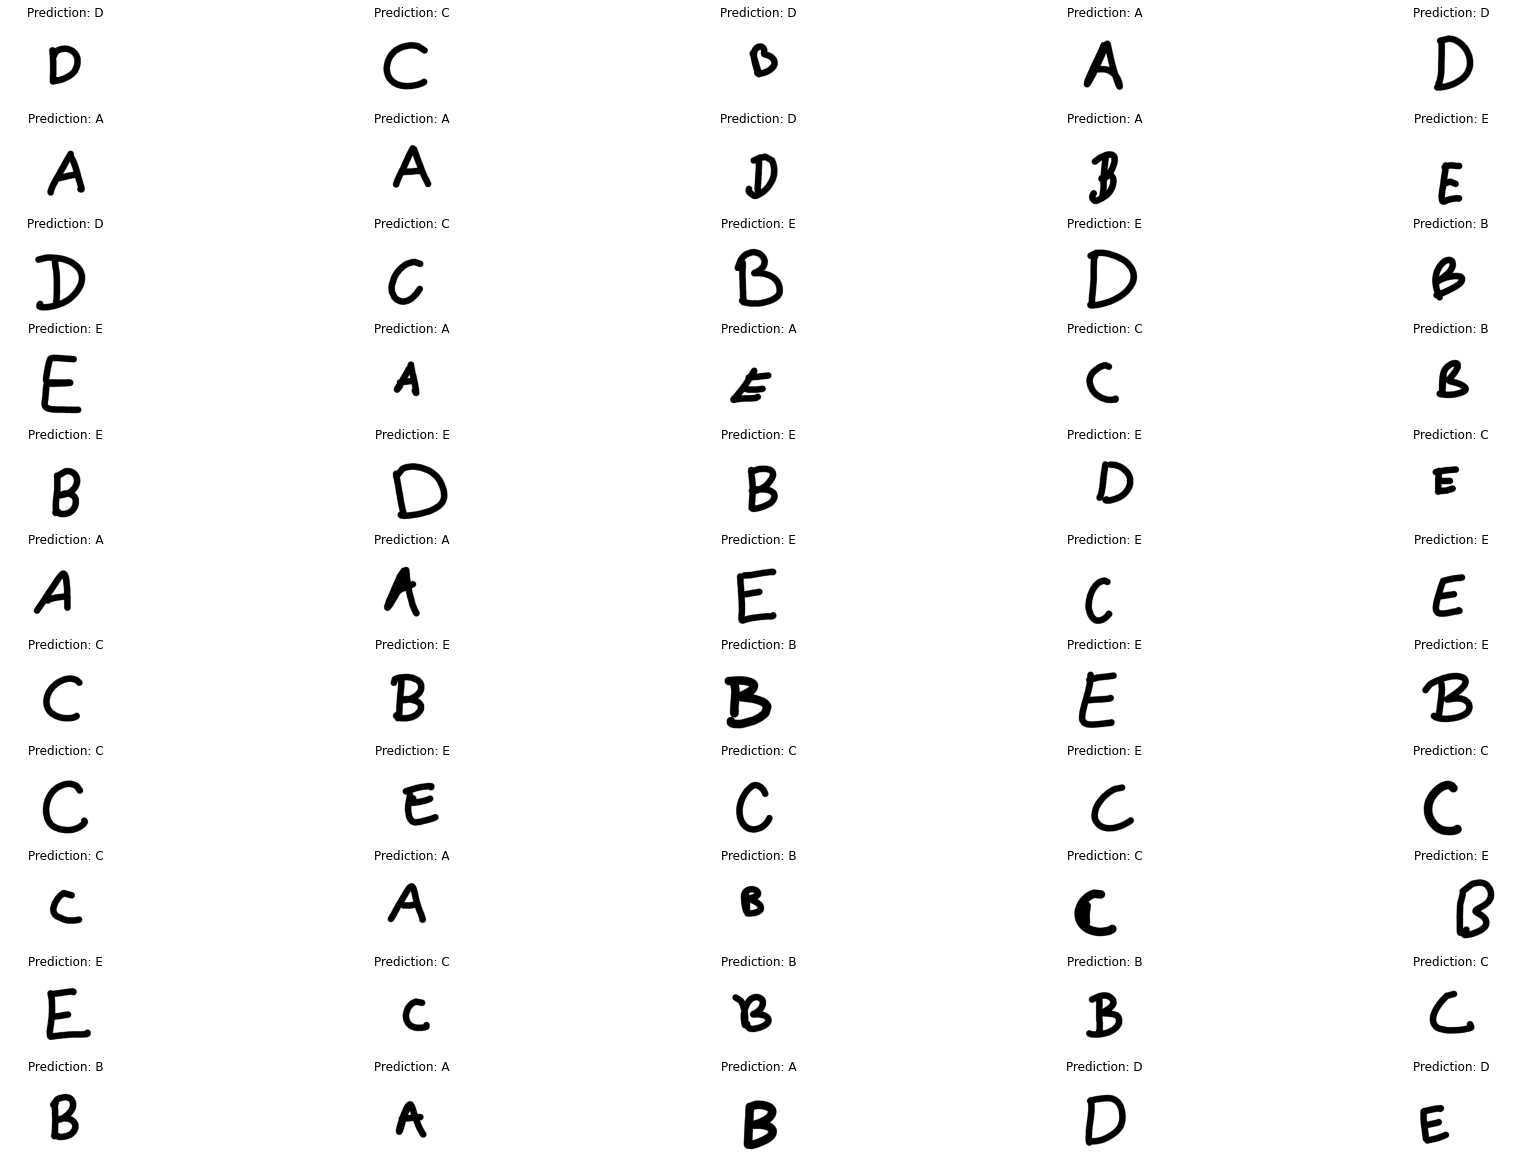

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 21))
fig.tight_layout(pad=3.0)
rows = 11
columns = 5 

for ndx, sample in enumerate(X_test):
  sample = sample.reshape((900, 1200, 3))
  im = Image.fromarray(sample)
  pred = predictions[ndx]
  # displaying
  fig.add_subplot(rows, columns, ndx + 1)
  plt.imshow(im)
  plt.axis('off')
  plt.title(f'Prediction: {keys[pred]}')
  # saving to drive
  im = im.save(f'{results_path}{keys[pred]}-{ndx}.jpg', 'JPEG')

 